Este notebook intenta calcular el OPPE usando DoWhy

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import dowhy
import matplotlib as plt

from dowhy import gcm
from dowhy import CausalModel

In [13]:
df_padded = pd.read_pickle('df_padded_100.pkl')

In [4]:
# creating the unfolded graph
causal_graph = nx.DiGraph()
edges = []
for i in range(30):
    edges.append(('s_'+ str(i), 'a_'+str(i)))
    edges.append(('a_'+ str(i), 'r_'+str(i)))
    edges.append(('s_'+ str(i), 'r_'+str(i)))
    if i < 29: edges.append(('s_'+ str(i), 's_'+str(i+1)))
print(edges)
causal_graph.add_edges_from(edges)

[('s_0', 'a_0'), ('a_0', 'r_0'), ('s_0', 'r_0'), ('s_0', 's_1'), ('s_1', 'a_1'), ('a_1', 'r_1'), ('s_1', 'r_1'), ('s_1', 's_2'), ('s_2', 'a_2'), ('a_2', 'r_2'), ('s_2', 'r_2'), ('s_2', 's_3'), ('s_3', 'a_3'), ('a_3', 'r_3'), ('s_3', 'r_3'), ('s_3', 's_4'), ('s_4', 'a_4'), ('a_4', 'r_4'), ('s_4', 'r_4'), ('s_4', 's_5'), ('s_5', 'a_5'), ('a_5', 'r_5'), ('s_5', 'r_5'), ('s_5', 's_6'), ('s_6', 'a_6'), ('a_6', 'r_6'), ('s_6', 'r_6'), ('s_6', 's_7'), ('s_7', 'a_7'), ('a_7', 'r_7'), ('s_7', 'r_7'), ('s_7', 's_8'), ('s_8', 'a_8'), ('a_8', 'r_8'), ('s_8', 'r_8'), ('s_8', 's_9'), ('s_9', 'a_9'), ('a_9', 'r_9'), ('s_9', 'r_9'), ('s_9', 's_10'), ('s_10', 'a_10'), ('a_10', 'r_10'), ('s_10', 'r_10'), ('s_10', 's_11'), ('s_11', 'a_11'), ('a_11', 'r_11'), ('s_11', 'r_11'), ('s_11', 's_12'), ('s_12', 'a_12'), ('a_12', 'r_12'), ('s_12', 'r_12'), ('s_12', 's_13'), ('s_13', 'a_13'), ('a_13', 'r_13'), ('s_13', 'r_13'), ('s_13', 's_14'), ('s_14', 'a_14'), ('a_14', 'r_14'), ('s_14', 'r_14'), ('s_14', 's_15')

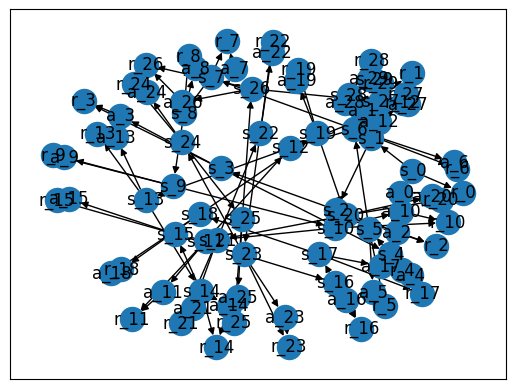

In [11]:
layout = nx.spring_layout(causal_graph)
nx.draw_networkx(causal_graph, pos=layout, with_labels = True, arrows = True)

In [12]:
causal_model = gcm.StructuralCausalModel(causal_graph)

In [15]:
causal_model.set_causal_mechanism('s_0', gcm.EmpiricalDistribution())

In [16]:
for i in range(30):
    causal_model.set_causal_mechanism('a_'+str(i), gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))
    causal_model.set_causal_mechanism('r_'+str(i), gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))
    if i > 0:
        causal_model.set_causal_mechanism('s_'+str(i), gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))

In [18]:
gcm.fit(causal_model, df_padded)

Fitting causal mechanism of node a_0:   1%|          | 1/90 [00:00<00:00, 628.93it/s]


ValueError: setting an array element with a sequence.